Watershed

C:\Users\julie\AppData\Local\Temp\ipykernel_25856\3276433509.py:16: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(distance_map, indices=False, min_distance=70, labels=thresh)


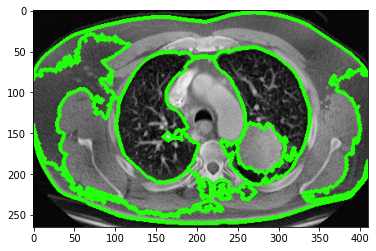

In [2]:
import cv2
import numpy as np
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage
import matplotlib.pyplot as plt

# Load in image, convert to gray scale, and Otsu's threshold
image = cv2.imread('Cancer_enh.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Compute Euclidean distance from every binary pixel
# to the nearest zero pixel then find peaks
distance_map = ndimage.distance_transform_edt(thresh)
local_max = peak_local_max(distance_map, indices=False, min_distance=70, labels=thresh)

# Perform connected component analysis then apply Watershed
markers = ndimage.label(local_max, structure=np.ones((3, 3)))[0]
labels = watershed(-distance_map, markers, mask=thresh)

# Iterate through unique labels
total_area = 0
for label in np.unique(labels):
    if label == 0:
        continue

    # Create a mask
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255

    # Find contours and determine contour area
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    c = max(cnts, key=cv2.contourArea)
    area = cv2.contourArea(c)
    total_area += area
    cv2.drawContours(image, [c], -1, (36,255,12), 4)

plt.imshow(image)
plt.show()

Simple linear iterative clustering (SLIC)

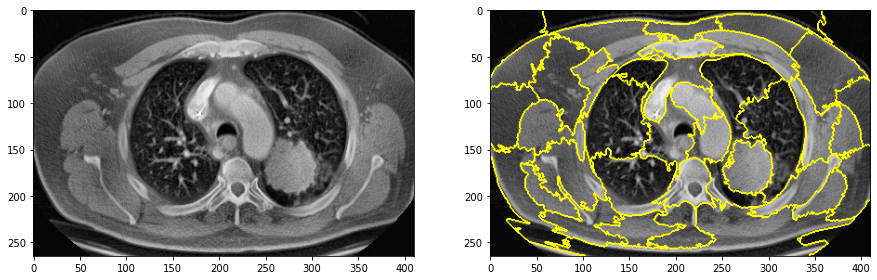

In [3]:
from skimage.segmentation import slic, mark_boundaries
import cv2
import matplotlib.pyplot as plt
 
# Setting the plot figure as 15, 15
plt.figure(figsize=(15, 15))
 
# Sample Image of scikit-image package
img=cv2.imread("Cancer_enh.png",0)/255
 
# Applying SLIC segmentation
# for the edges to be drawn over
img_segments = slic(img, n_segments=50,compactness=0.1)
 
plt.subplot(1, 2, 1)
 
# Plotting the original image
plt.imshow(img, cmap='gray')
 
# Detecting boundaries for labels
plt.subplot(1, 2, 2)
 
# Plotting the output of marked_boundaries
# function i.e. the image with segmented boundaries
plt.imshow(mark_boundaries(img, img_segments))

Region growing

Text(0.5, 1.0, 'Region growing')

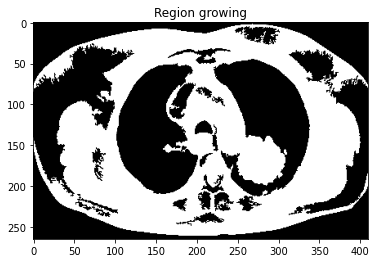

In [8]:
import matplotlib.pyplot as plt
import cv2
from skimage.segmentation import flood
from skimage.morphology import area_closing

img=cv2.imread('Cancer_enh.png',0)
light_coat = flood(img, seed_point=(175, 275), tolerance=50)
light_coat=area_closing(light_coat)
plt.imshow(light_coat, cmap='gray')
plt.title('Region growing')

Thresholding